# <u>Group Project: Kickstarter Campaign</u>

Kickstarter is a company that provides the space for independent artists, creative, innovators, and entrepreneurs to bring their unique projects to life. Kickstarter allows anyone to financially support the project through an online pledging system - this means; anyone can pledge a specific amount of money towards the funding goal of the project. Kickstarter projects (also called campaigns) are all-or-nothing -- meaning, if the funding goal isn't met 100% (or exceeded), the project campaign fails and no funding is provided. The stakes are high - but what is it about certain campaigns that make them succeed while others fail? 

You have joined the marketing team for Kickstarter and you are tasked with exploring the features of several campaigns over the past few years. You are responsible for looking at this dataset and pulling out key insights about the characteristics of Kickstarter campaigns that make them more likely to succeed or fail. The marketing team at Kickstarter has a limited amount of funds to devote to highlighting specific projects, and they want to highlight projects that have the best chance of succeeding (i.e. meeting the funding goal). Can you help them determine who that might be?

Complete the steps below to take a dataset from inception to insights, for the purpose of answering the following two questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

After you have combed through the data, your group will put together a presentation (including visualizations), that clearly answers the two questions above. The Kickstarter dataset is posted to Canvas. Complete the code in the notebook below to complete the project. <b> You are NOT restricted to the steps laid out in this notebook to complete your project, You can conduct additional analyses or create additional visualizations. This notebook is everything you need to cover, but feel free to expand on these steps! This includes completing regression analyses with the dataset.</b>

## <font color=red>Part 1: Domain Knowledge</font>

Before you begin looking at the data, you need to expand your knowledge of the subject matter. Start by visiting www.kickstarter.com and read all you can about the company. What is the objective of the company? How does it work? What does the project timeline look like? You should research the company until you feel comfortable speaking about the basics of Kickstarter projects. Use the space below (double-click the cell to activate) to write a brief paragraph about what you learned about Kickstarter. 

### <font color=red>Questions to Answer</font>
1. What is Kickstarter?
2. What is the purpose of Kickstarter?
3. Who are the "backers" of a Kickstarter campaign?
4. How is success determined for a project campaign?

****

### <font color=red>KICKSTARTER INFORMATION</font>

#### In a nutshell:
Kickstarter is an online funding platform designed as a connection between creativity and capital. Its purpose is to break free from a central focus on profit at all costs.  The "backers" are individuals or groups that pledge money if a project gets fully funded. Success is determined as a project meeting its funding goal within its timeline.


## <font color=darkorange>Part 2: Data Import and Cleaning</font>

Now that you are familiar with where the data is coming from, you are ready to start examining the data. The Kickstarter Dataset is a collection of project campaign information from 2016. Data includes information about the project name, length, country of origin, goal, and the amount of money raised, etc. If you open the Kickstarter Dataset in excel, the second tab provides descriptions of each of the columns/variables. Import the dataset into this notebook and follow the steps below to gather information about the data and to clean up the dataset. Use the space below (double-click the cell to activate) to write a brief paragraph describing the dataset and the steps you took while cleaning the data. 

### <font color=darkorange>Questions to Answer</font>
1. How many columns are in the dataset? How many rows?
2. What type of variables (continuous, categorical) make up this dataset?
3. Which variables have missing values? 
4. How did you handle the missing data in the dataset?
5. How many rows are in your dataset after handling missing data?
6. Are there any odd or inappropriate values within a column that don't make sense? If so, what are they?
7. What percentage of the each project was funded? In other words, how close were they to reaching the goal? You will need to create a new variable to answer this question.

***

### <font color=darkorange>DATASET INFORMATION AND CLEANING</font>

#### Answers below:
1. 281,856 rows and 14 columns
2. All types of variables - integer, decimal, date/time, and categorical
3. missing variables in the following categories: name, usd pledged
4. a project without a name is still a project, so just changed the name to unknown; a project without pledges, though, is neither a success nor a failure and therefore useless to include in dataset (dropped)
5. 281,646 rows after handling missing data
6. I found no odd or inappropriate values in any of the columns, including usd pledged, which has no negative values
7. done

In [1]:
## import libraries and import Kickstarter dataset
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans

df = pd.read_excel("Kickstarter_Dataset.xlsx")

## this is a large dataset, we want to see all rows 
# pd.set_option('display.max_rows', None)


## this is a very large dataset, be patient, it may take a while to import!!



In [2]:
## determine dataset shape (number of rows and columns)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281856 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281856 non-null  int64         
 1   name           281821 non-null  object        
 2   main_category  281856 non-null  object        
 3   category       281856 non-null  object        
 4   country        281856 non-null  object        
 5   currency       281856 non-null  object        
 6   launched       281856 non-null  datetime64[ns]
 7   deadline       281856 non-null  datetime64[ns]
 8   length_days    281856 non-null  int64         
 9   goal           281856 non-null  float64       
 10  pledged        281856 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281856 non-null  int64         
 13  state          281856 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

In [ ]:
## determine dataset features (info) and data types



In [3]:
## determine which variables have missing data 
df.isnull().sum()


ID                 0
name              35
main_category      0
category           0
country            0
currency           0
launched           0
deadline           0
length_days        0
goal               0
pledged            0
usd pledged      210
backers            0
state              0
dtype: int64

In [4]:
## handling missing data

## fill all the missing values in "name" with "Unknown Project Name"
df["name"].replace(np.nan, "Unknown Project Name", inplace = True)
#checking to see that it was done correctly
df.loc[df["name"]=="Unknown Project Name"]

## drop all the rows where "usd pledged" is missing
df.dropna(subset=["usd pledged"], inplace = True)

# checking for missing values
df.isnull().sum()

ID               0
name             0
main_category    0
category         0
country          0
currency         0
launched         0
deadline         0
length_days      0
goal             0
pledged          0
usd pledged      0
backers          0
state            0
dtype: int64

In [5]:
## inappropriate values in categorical variables; check value counts
df.info()
df["main_category"].value_counts()
df["category"].value_counts()
df["country"].value_counts()
df["currency"].value_counts()
df["state"].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281646 entries, 0 to 281855
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             281646 non-null  int64         
 1   name           281646 non-null  object        
 2   main_category  281646 non-null  object        
 3   category       281646 non-null  object        
 4   country        281646 non-null  object        
 5   currency       281646 non-null  object        
 6   launched       281646 non-null  datetime64[ns]
 7   deadline       281646 non-null  datetime64[ns]
 8   length_days    281646 non-null  int64         
 9   goal           281646 non-null  float64       
 10  pledged        281646 non-null  float64       
 11  usd pledged    281646 non-null  float64       
 12  backers        281646 non-null  int64         
 13  state          281646 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(3), object(6

failed        168503
successful    113143
Name: state, dtype: int64

In [7]:
df.loc[df["usd pledged"]<0].index

Int64Index([], dtype='int64')

In [8]:
df3 = df.copy()

In [9]:
## drop unneeded columns (project ID, name, pledged, launched, deadline)
# you will use usd pledged from now on

df3.drop(columns = ["ID", "name", "launched", "deadline", "pledged"], inplace = True)

df3.head()


,main_category,category,country,currency,length_days,goal,usd pledged,backers,state
0,Food,Cookbooks,US,USD,29,13730.0,3984.000000,46,failed
1,Technology,3D Printing,AT,EUR,35,75000.0,1561.784015,31,failed
2,Technology,3D Printing,AT,EUR,30,15000.0,4152.402045,46,failed
3,Technology,3D Printing,AT,EUR,30,20000.0,19.435528,6,failed
4,Technology,3D Printing,AT,EUR,40,20000.0,2908.076574,29,failed


In [15]:
# create a new column
## percentage of project that was funded - how close were they to reaching the goal?

df["pct_funded"] = (df["usd pledged"]/df["goal"])*100

In [16]:
df.describe()

,ID,length_days,goal,pledged,usd pledged,backers,pct_funded
count,2.816460e+05,281646.000000,2.816460e+05,2.816460e+05,2.816460e+05,281646.000000,2.816460e+05
mean,1.074977e+09,33.976520,4.181597e+04,9.441571e+03,8.575848e+03,111.934801,2.762000e+02
std,6.194735e+08,12.894187,1.043830e+06,9.406700e+04,8.916948e+04,996.631624,1.826263e+04
min,5.971000e+03,1.000000,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.373189e+08,30.000000,2.000000e+03,5.000000e+01,4.000000e+01,2.000000,6.000000e-01
50%,1.075998e+09,30.000000,5.000000e+03,7.710000e+02,6.910000e+02,15.000000,1.661484e+01
75%,1.611435e+09,36.000000,1.500000e+04,4.448875e+03,4.109040e+03,62.000000,1.080828e+02
max,2.147476e+09,92.000000,1.000000e+08,2.033899e+07,2.033899e+07,219382.000000,5.526657e+06


## <font color=#EAC117>Part 3: Exploratory Analysis</font>

With a clean dataset, you are now ready to start exploring the variables in your dataset. Don't worry about how your variables relate to each other - we will cover that in the next section. For now, it's more important that you get a clear sense of the variable characteristics on their own. Follow the steps below to explore all of the variables within your dataset and preform descriptive statistics. In addition to the descriptive statistics, you are tasked with creating a visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to explore the data. 

### <font color=#EAC117>Questions to Answer</font>
1.	What is the average (mean) for the following variables: goal, usd pledged, backers, and length? 
2.	What is the maximum value, minimum value, and range for the following variables: goal, usd pledged, backers, and length?
3.	What is the most common (mode) length for campaign projects?
4.	Considering the categorical variables, what is the most frequent main category group? How many projects are classified under this category? What is the most frequent sub-category? How many projects are classified under this category? 
5.	Considering the categorical variables, what is the least frequent main category group? How many projects are classified under this category? What is the least frequent sub-category? How many projects are classified under this category? 
6.	Which country has started the most Kickstarter campaigns?
7.	How many projects have failed? How many projects have succeeded?

### <font color=#EAC117>Visualizations to Create</font> 
* Number of Projects by Main Category
* Number of projects by State (outcome)
* Number of projects from each country
* Number of successful projects and failed projects by Main Category

***

### <font color=#EAC117>EXPLORATORY DATA ANALYSIS</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [18]:
df3 = df.copy()

In [19]:
## output descriptive statistics for numeric variables in the dataset
df3.describe()


,ID,length_days,goal,pledged,usd pledged,backers,pct_funded
count,2.816460e+05,281646.000000,2.816460e+05,2.816460e+05,2.816460e+05,281646.000000,2.816460e+05
mean,1.074977e+09,33.976520,4.181597e+04,9.441571e+03,8.575848e+03,111.934801,2.762000e+02
std,6.194735e+08,12.894187,1.043830e+06,9.406700e+04,8.916948e+04,996.631624,1.826263e+04
min,5.971000e+03,1.000000,1.000000e-02,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,5.373189e+08,30.000000,2.000000e+03,5.000000e+01,4.000000e+01,2.000000,6.000000e-01
50%,1.075998e+09,30.000000,5.000000e+03,7.710000e+02,6.910000e+02,15.000000,1.661484e+01
75%,1.611435e+09,36.000000,1.500000e+04,4.448875e+03,4.109040e+03,62.000000,1.080828e+02
max,2.147476e+09,92.000000,1.000000e+08,2.033899e+07,2.033899e+07,219382.000000,5.526657e+06


In [20]:
#finding mode of campaign lengths
df3["length_days"].mode()

0    30
Name: length_days, dtype: int64

In [21]:
## calculate the range for all numeric variables
days_range = df3["length_days"].max() - df3["length_days"].min()
goal_range = df3["goal"].max() - df3["goal"].min()
pledged_range = df3["usd pledged"].max() - df3["usd pledged"].min()
backers_range = df3["backers"].max() - df3["backers"].min()
pct_funded_range = df3["pct_funded"].max() - df3["pct_funded"].min()

print("Ranges")
print("--"*18)
print(f"Project length:\t\t{days_range} days")
print(f"Goal Amount:\t\t${int(goal_range)}")
print(f"USD Pledged Amount:\t${int(pledged_range)}")
print(f"Number of Backers:\t{int(backers_range)}")
print(f"Percent Funded:\t\t{int(pct_funded_range)*100}%")

Ranges
------------------------------------
Project length:		91 days
Goal Amount:		$99999999
USD Pledged Amount:	$20338986
Number of Backers:	219382
Percent Funded:		552665700%


In [22]:
## frequency of categorical variable groups
df3["main_category"].value_counts()


Film & Video    51108
Music           40868
Publishing      30254
Games           22429
Art             21805
Technology      21444
Design          20032
Food            18899
Fashion         15839
Theater          9340
Photography      8668
Comics           7918
Crafts           6310
Journalism       3537
Dance            3195
Name: main_category, dtype: int64

In [23]:
df3["category"].value_counts()

Product Design    14539
Documentary       13371
Shorts            10786
Music             10744
Food               9545
                  ...  
Weaving              59
Residencies          52
Letterpress          34
Chiptune             31
Taxidermy             9
Name: category, Length: 158, dtype: int64

In [24]:
df3["country"].value_counts()


US    229826
GB     23877
CA      9912
AU      5195
DE      2131
NL      1873
FR      1559
IT      1394
ES      1090
SE      1066
NZ       993
DK       672
IE       473
NO       430
CH       389
BE       329
AT       283
SG        70
HK        47
LU        33
MX         4
Name: country, dtype: int64

In [25]:
df3["currency"].value_counts()

USD    229826
GBP     23877
CAD      9912
EUR      9165
AUD      5195
SEK      1066
NZD       993
DKK       672
NOK       430
CHF       389
SGD        70
HKD        47
MXN         4
Name: currency, dtype: int64

In [26]:
df3["state"].value_counts()

failed        168503
successful    113143
Name: state, dtype: int64

<AxesSubplot:title={'center':'Number of Projects by Main Category'}, xlabel='main_category', ylabel='Count'>

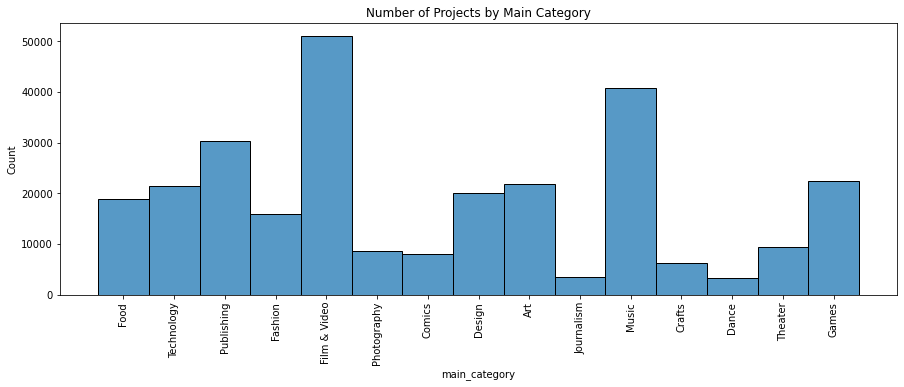

In [27]:
# visualization: number of projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Main Category")
sns.histplot(x = df3["main_category"], kde = False)


<AxesSubplot:title={'center':'Number of Projects by Failure/Success'}, xlabel='state', ylabel='Count'>

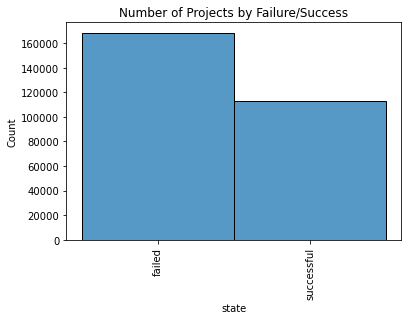

In [28]:
# visualization: number of projects by state
plt.title("Number of Projects by Failure/Success")
plt.xticks(rotation = 90)
sns.histplot(x = df3["state"], kde = False)

<AxesSubplot:title={'center':'Number of Projects by Country'}, xlabel='country', ylabel='Count'>

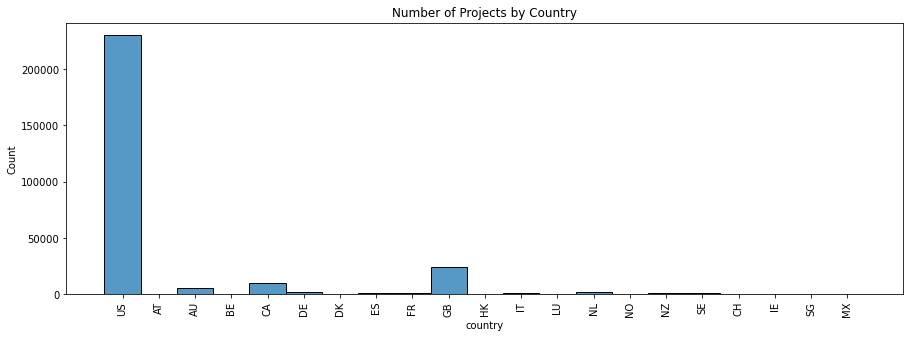

In [29]:
# visualization: number of projects by country

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Projects by Country")
sns.histplot(x = df3["country"], kde = False)

<AxesSubplot:title={'center':'Number of Failed/Successful Projects by Main Category'}, xlabel='main_category', ylabel='count'>

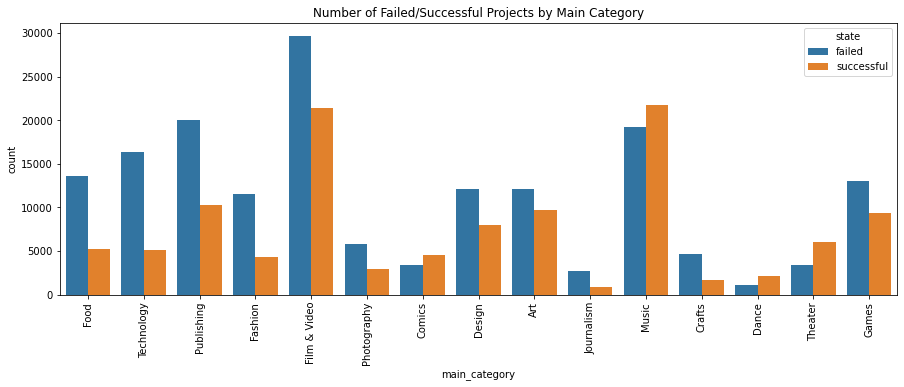

In [30]:
# visualization: number of failed/successful projects by main category

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Number of Failed/Successful Projects by Main Category")
sns.countplot(x = df3["main_category"], hue = df3["state"])

## <font color=#6AA121>Part 4: Variable Relationships</font>

It's time to explore the relationships between variables and answer some of the critical questions for the project. Your dependent/outcome variable is <b>STATE</b> - this is the variable that captures if the project was successful or not. In addition to exploring the relationships between your other independent variables, you want to pay close attention to the relationship between your independent variables and state. Follow the steps below to explore the relationships between your variables. In addition, you are tasked with creating visualizations related to your results. Stylistic choices related to the visualizations is up to your group. Use the space below (double-click the cell to activate) to write a brief paragraph describing the steps you took to determine variable relationships. 

### <font color=#6AA121>Questions to Answer</font>
1.	How correlated are the numeric variables within this dataset? Create a correlation matrix to find out. Is anything highly correlated?
2.	What is the average amount of money pledged across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most profitable? 
3.	What is the average number of backers across each of the main categories? What about across the following: sub-category, country, currency, and state? Which main category is the most popular?
4.	What percentage of projects succeed and fail across each of the main categories?
5.	Which of the main categories have the highest success rate (top 3)? Which of the sub-categories have the highest success rate (top 3)?
6.	What is the average duration of a campaign for projects that succeed? What is the average duration for projects that fail?
7.  What is the average funding goal of a campaign for projects that succeed? What is the average funding goal for projects that fail?


### <font color=#6AA121>Visualizations to Create</font> 
* Average Pledge by Main Category
* Average Num Backers by Main Category
* Average Pledge by State
* Average Num Backers by State
* Average Funding Goal by Main Category
* Average Funding Goal by State
* Average Percentage of Funding Collected by Main Category

***

### <font color=#6AA121>RELATIONSHIPS BETWEEN VARIABLES</font>

#### Start your paragraph here . . . Be sure to answer all questions in this space!

In [32]:
## create a correlation matrix for the continuous variables
df3.drop(columns = "ID", inplace = True)
df3.corr()

# strongest correlation between amount pledged and number of backers

,length_days,goal,pledged,usd pledged,backers,pct_funded
length_days,1.000000,0.022077,0.006749,0.006316,-0.001391,-0.002499
goal,0.022077,1.000000,0.007927,0.007617,0.006090,-0.000561
pledged,0.006749,0.007927,1.000000,0.950399,0.750483,0.009932
usd pledged,0.006316,0.007617,0.950399,1.000000,0.716784,0.010074
backers,-0.001391,0.006090,0.750483,0.716784,1.000000,0.017322
pct_funded,-0.002499,-0.000561,0.009932,0.010074,0.017322,1.000000


In [46]:
df3.drop(columns = "pledged", inplace = True)

In [47]:
## average pledge across categoricial variables (groupby)
df3["usd pledged"].groupby(df3["main_category"]).mean()

main_category
Art              3069.410309
Comics           6832.580096
Crafts           1514.296337
Dance            3424.076079
Design          23132.730636
Fashion          5665.158035
Film & Video     6518.644822
Food             5221.043908
Games           22622.060660
Journalism       2793.559315
Music            3930.182092
Photography      3265.703688
Publishing       3206.302548
Technology      20898.350418
Theater          4018.430797
Name: usd pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Main Category'}, xlabel='main_category', ylabel='usd pledged'>

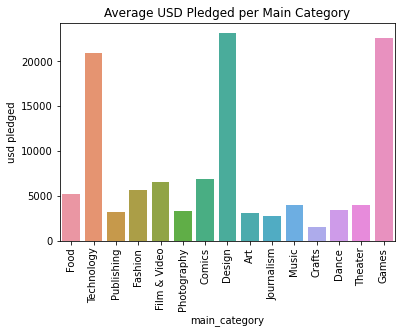

In [48]:
# visualizing Average USD Pledged per Main Category
plt.title("Average USD Pledged per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["usd pledged"], ci = None)


In [49]:
df3["usd pledged"].groupby(df3["category"]).mean()

category
3D Printing    70321.848632
Academic        2003.564080
Accessories     7047.600829
Action          4128.312842
Animals         2382.214298
                   ...     
Woodworking     1549.588085
Workshops       1357.862474
World Music     3702.566343
Young Adult     1383.475593
Zines           2125.691922
Name: usd pledged, Length: 158, dtype: float64

In [50]:
df3["usd pledged"].groupby(df3["country"]).mean()

country
AT     9323.329982
AU     4870.551735
BE     5558.685332
CA     6276.386389
CH     8129.832529
DE     8366.607351
DK     5776.047339
ES     4123.306576
FR    11239.006871
GB     6910.615376
HK     2916.330505
IE     4781.257653
IT     4492.361917
LU     4329.165422
MX        8.136906
NL     5412.893977
NO     3355.555461
NZ     4143.385873
SE     4611.153023
SG     3139.606720
US     9058.345174
Name: usd pledged, dtype: float64

In [51]:
df3["usd pledged"].groupby(df3["currency"]).mean()

currency
AUD    4870.551735
CAD    6276.386389
CHF    8129.832529
DKK    5776.047339
EUR    6886.815741
GBP    6910.615376
HKD    2916.330505
MXN       8.136906
NOK    3355.555461
NZD    4143.385873
SEK    4611.153023
SGD    3139.606720
USD    9058.345174
Name: usd pledged, dtype: float64

In [52]:
df3["usd pledged"].groupby(df3["state"]).mean()

state
failed         1279.467288
successful    19442.292414
Name: usd pledged, dtype: float64

<AxesSubplot:title={'center':'Average USD Pledged per Success/Fail State'}, xlabel='state', ylabel='usd pledged'>

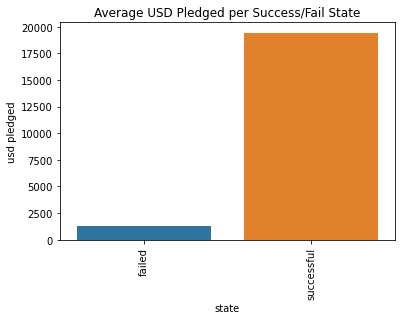

In [53]:
# visualizing Average USD Pledged per State
plt.title("Average USD Pledged per Success/Fail State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["usd pledged"], ci = None)

In [54]:
## average number of backers across categorical variables (groupby)
df3["backers"].groupby(df3["main_category"]).mean()

main_category
Art              42.541206
Comics          145.676812
Crafts           29.562441
Dance            45.290454
Design          268.927566
Fashion          69.507418
Film & Video     73.161697
Food             59.249431
Games           386.230282
Journalism       43.399774
Music            57.797494
Photography      40.766036
Publishing       57.901567
Technology      187.457750
Theater          49.613383
Name: backers, dtype: float64

In [55]:
df3["backers"].groupby(df3["category"]).mean()

category
3D Printing    273.092308
Academic        30.544068
Accessories     99.114499
Action          59.240404
Animals         34.532663
                  ...    
Woodworking     22.099762
Workshops       21.630252
World Music     58.424650
Young Adult     23.413732
Zines           53.453488
Name: backers, Length: 158, dtype: float64

In [56]:
df3["backers"].groupby(df3["country"]).mean()

country
AT     69.727915
AU     82.111453
BE     50.629179
CA     97.199758
CH     76.814910
DE    100.707180
DK     70.949405
ES     71.709174
FR    126.205901
GB     88.638481
HK     68.595745
IE     56.473573
IT     48.080344
LU     36.969697
MX      9.250000
NL     61.481580
NO     39.090698
NZ     67.182276
SE     80.296435
SG    180.557143
US    117.571350
Name: backers, dtype: float64

In [57]:
df3["backers"].groupby(df3["currency"]).mean()

currency
AUD     82.111453
CAD     97.199758
CHF     76.814910
DKK     70.949405
EUR     80.308347
GBP     88.638481
HKD     68.595745
MXN      9.250000
NOK     39.090698
NZD     67.182276
SEK     80.296435
SGD    180.557143
USD    117.571350
Name: backers, dtype: float64

In [58]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         16.768301
successful    253.665538
Name: backers, dtype: float64

<AxesSubplot:title={'center':'Average Number Backers per State'}, xlabel='state', ylabel='backers'>

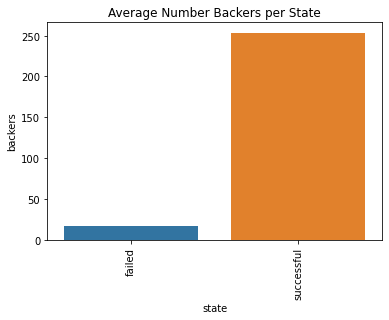

In [59]:
# visualizing Average Number Backers per State
plt.title("Average Number Backers per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["backers"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per Main Category'}, xlabel='main_category', ylabel='goal'>

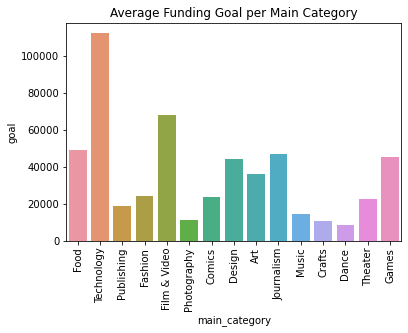

In [60]:
# visualizing Average Funding Goal per Main Category
plt.title("Average Funding Goal per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Average Funding Goal per State'}, xlabel='state', ylabel='goal'>

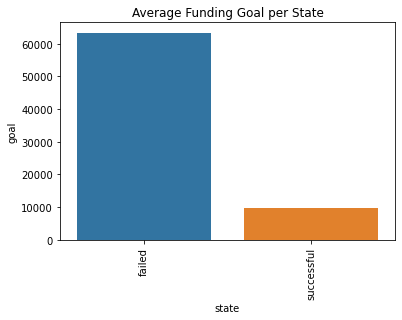

In [61]:
# visualizing Average Funding Goal per State
plt.title("Average Funding Goal per State")
plt.xticks(rotation = 90)
sns.barplot(x = df3["state"], y = df3["goal"], ci = None)

<AxesSubplot:title={'center':'Average Percentage Funded per Main Category'}, xlabel='main_category', ylabel='pct_funded'>

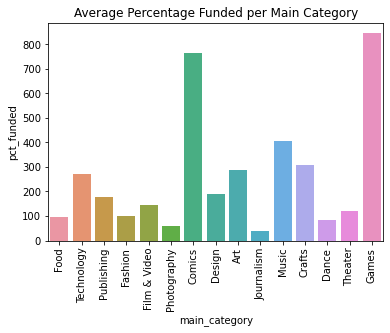

In [62]:
# visualizing Average Percentage Funded per Main Category
plt.title("Average Percentage Funded per Main Category")
plt.xticks(rotation = 90)
sns.barplot(x = df3["main_category"], y = df3["pct_funded"], ci = None)

In [63]:
## averages of all numeric variables grouped by state (groupby)
df3["length_days"].groupby(df3["state"]).mean()

state
failed        35.181658
successful    32.181717
Name: length_days, dtype: float64

In [64]:
df3["usd pledged"].groupby(df3["state"]).mean()

state
failed         1279.467288
successful    19442.292414
Name: usd pledged, dtype: float64

In [65]:
df3["goal"].groupby(df3["state"]).mean()

state
failed        63432.182763
successful     9623.108753
Name: goal, dtype: float64

In [66]:
df3["backers"].groupby(df3["state"]).mean()

state
failed         16.768301
successful    253.665538
Name: backers, dtype: float64

In [67]:
df3["pct_funded"].groupby(df3["state"]).mean()

state
failed          8.894607
successful    674.295756
Name: pct_funded, dtype: float64

In [68]:
# create bins for number of backers

bins = [0, 5, 10, 15, 30, 60, 100, 1000000]
bin_labels = ["0-4", "5-9", "10-14", "15-29", "30-59", "60-99", "100-999999"]

df3["backers_group"] = pd.cut(df3["backers"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,usd pledged,backers,state,pct_funded,backers_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.000000,46,failed,29.016752,30-59
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,1561.784015,31,failed,2.082379,30-59
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,4152.402045,46,failed,27.682680,30-59
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,19.435528,6,failed,0.097178,5-9
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2908.076574,29,failed,14.540383,15-29


In [71]:
# create bins for usd pledged

bins = [0, 20, 40, 100, 500, 2000, 5000, 10000, 100000, 30000000]
bin_labels = ["0-19", "20-39", "40-99", "100-499", "500-1,999", "2,000-4,999", "5,000-9,999", "10,000-99,999", "100,000+"]

df3["usd_pledged_group"] = pd.cut(df3["usd pledged"], bins, labels = bin_labels)

df3.head()

,name,main_category,category,country,currency,launched,deadline,length_days,goal,usd pledged,backers,state,pct_funded,backers_group,usd_pledged_group
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.000000,46,failed,29.016752,30-59,"2,000-4,999"
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,1561.784015,31,failed,2.082379,30-59,"500-1,999"
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,4152.402045,46,failed,27.682680,30-59,"2,000-4,999"
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,19.435528,6,failed,0.097178,5-9,0-19
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2908.076574,29,failed,14.540383,15-29,"2,000-4,999"


In [93]:
# create bins for pct_funded

bins = [0, 1, 15, 50, 90, 100, 110, 55000]
bin_labels = ["0-0.9", "1-4", "15-49", "50-89", "90-99", "100-109", "110+" ]

df3["pct_funded_group"] = pd.cut(df3["pct_funded"], bins, labels = bin_labels)

df3.head()

C:\Users\liket\AppData\Local\Temp\ipykernel_25116\2421149236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["pct_funded_group"] = pd.cut(df3["pct_funded"], bins, labels = bin_labels)


,name,main_category,category,country,currency,launched,deadline,length_days,goal,usd pledged,backers,state,pct_funded,backers_group,usd_pledged_group,pct_funded_group,zscore_pct_funded
0,French Cuisine,Food,Cookbooks,US,USD,2014-08-09 03:16:02,2014-09-08 00:46:23,29,13730.0,3984.000000,46,failed,29.016752,30-59,"2,000-4,999",15-49,0.013535
1,HotRod Henry SUPERCHARGED - the ultimate 3D pr...,Technology,3D Printing,AT,EUR,2016-06-16 16:30:33,2016-07-21 23:59:00,35,75000.0,1561.784015,31,failed,2.082379,30-59,"500-1,999",1-4,0.015010
2,PHAbulous Philaments - 3D printing: natural an...,Technology,3D Printing,AT,EUR,2015-07-22 12:08:26,2015-08-21 12:08:26,30,15000.0,4152.402045,46,failed,27.682680,30-59,"2,000-4,999",15-49,0.013608
3,Schokostruder - Chocolate & Liquid Extruder f...,Technology,3D Printing,AT,EUR,2016-01-25 18:48:09,2016-02-24 18:48:09,30,20000.0,19.435528,6,failed,0.097178,5-9,0-19,0-0.9,0.015118
4,StarterMate - the 3D printing starter kit for ...,Technology,3D Printing,AT,EUR,2015-09-30 00:26:43,2015-11-09 00:26:43,40,20000.0,2908.076574,29,failed,14.540383,15-29,"2,000-4,999",1-4,0.014328


In [94]:
# there is a wild outlier in one of the categories ruining a graph - need to remove it
df3["zscore_pct_funded"] = np.abs(stats.zscore(df3["pct_funded"]))

C:\Users\liket\AppData\Local\Temp\ipykernel_25116\1002722841.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["zscore_pct_funded"] = np.abs(stats.zscore(df3["pct_funded"]))


In [87]:
pct_funded_outlier = df3.loc[df3["zscore_pct_funded"]>3]

print(pct_funded_outlier)

                                                     name main_category  \
758               A Post-Match Debrief from 2015 Matchers    Publishing   
10542             Roll Play Dice Tees 2: Item Enchantment       Fashion   
14481       YOGA : TIME  |  The best way to practice yoga    Technology   
16745           Support Others to Share Their Art & Soul!           Art   
22213   ROLL¥A¥SKETCH : Whimsical Coloring Book & Orig...    Publishing   
...                                                   ...           ...   
264536                                        Energy Hook         Games   
266430                           The Hat Man: Shadow Ward         Games   
275670  Hang Out With Me, Season 1 (a Myq Kaplan podca...  Film & Video   
278870               Northwoods Coasters: Don't-cha-know!        Crafts   
281436                     My Father DIDN'T Kill Himself!    Publishing   

           category country currency            launched            deadline  \
758        Academic

In [91]:
df3 = df3[df3["zscore_pct_funded"]<=3]

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281533 entries, 0 to 281855
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   name               281533 non-null  object        
 1   main_category      281533 non-null  object        
 2   category           281533 non-null  object        
 3   country            281533 non-null  object        
 4   currency           281533 non-null  object        
 5   launched           281533 non-null  datetime64[ns]
 6   deadline           281533 non-null  datetime64[ns]
 7   length_days        281533 non-null  int64         
 8   goal               281533 non-null  float64       
 9   usd pledged        281533 non-null  float64       
 10  backers            281533 non-null  int64         
 11  state              281533 non-null  object        
 12  pct_funded         281533 non-null  float64       
 13  backers_group      248161 non-null  category

In [103]:
#removing more outliers

df3["zscore_usd_pledged"] = np.abs(stats.zscore(df3["usd pledged"]))
usd_pledged_outlier = df3.loc[df3["zscore_usd_pledged"]>3]
print(usd_pledged_outlier)

                                                     name main_category  \
17      The Peachy Printer - The First $100 3D Printer...    Technology   
79      BigBox: THE Open Source Hi-Spec Desktop 3D Pri...    Technology   
83      Robox : Desktop 3D Printer and Micro-Manufactu...    Technology   
92      OverLord 3D Printer: MULTI-COLOR. SMART. STYLISH.    Technology   
109       LIX - The Smallest 3D Printing Pen in the World    Technology   
...                                                   ...           ...   
273284         Religion: Ruining Everything Since 4004 BC        Comics   
273394                              Ava's Demon: Book Two        Comics   
274465              Bring Penny Arcade's Automata to Life  Film & Video   
276292                             Video Game High School  Film & Video   
276407          The Lizzie Bennet Diaries DVD...and More!  Film & Video   

           category country currency            launched            deadline  \
17      3D Printing

C:\Users\liket\AppData\Local\Temp\ipykernel_25116\3831878065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["zscore_usd_pledged"] = np.abs(stats.zscore(df3["usd pledged"]))


In [105]:
df3 = df3[df3['zscore_usd_pledged']<=3]

In [106]:
df3.describe()

,length_days,goal,usd pledged,backers,pct_funded,zscore_pct_funded,zscore_usd_pledged
count,280557.000000,2.805570e+05,280557.000000,280557.000000,280557.000000,280557.000000,280557.000000
mean,33.972145,4.135771e+04,5763.580987,86.007239,91.448293,0.171601,0.108076
std,12.901238,1.044857e+06,17663.577599,442.842704,573.449584,0.932001,0.173054
min,1.000000,1.500000e-01,0.000000,0.000000,0.000000,0.000015,0.000001
25%,30.000000,2.000000e+03,38.116275,2.000000,0.580000,0.061357,0.071771
50%,30.000000,5.000000e+03,680.000000,15.000000,16.280000,0.147670,0.093679
75%,36.000000,1.500000e+04,4049.000000,61.000000,107.780000,0.160005,0.097422
max,92.000000,1.000000e+08,271154.010000,154926.000000,54575.666667,90.026068,2.996524


<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='main_category', ylabel='usd pledged'>

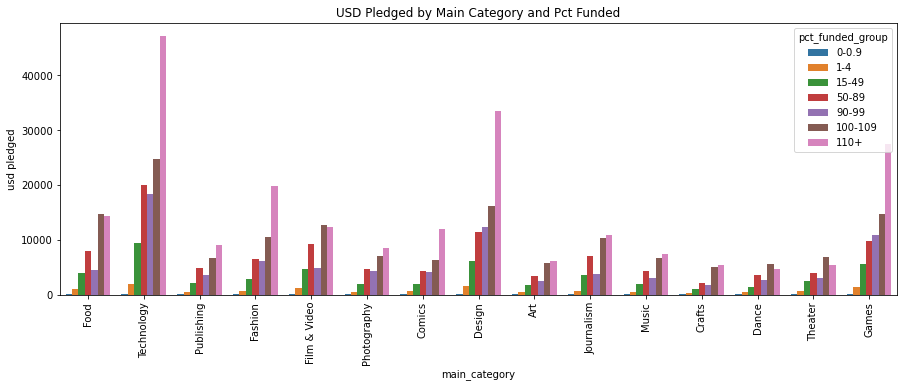

In [107]:
# average number of backers and pledges by main category 
# include the variable "pct_funded" to get a better picture of the projects that met/exceeded their goal

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["main_category"], y = df3["usd pledged"], hue = df3["pct_funded_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Backers'}, xlabel='main_category', ylabel='usd pledged'>

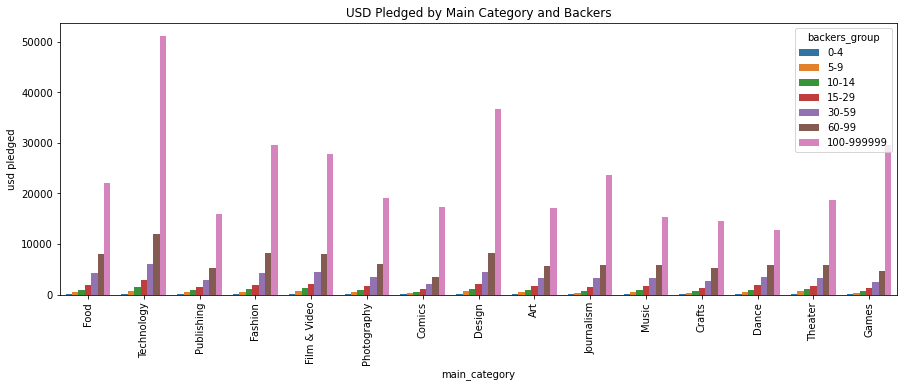

In [108]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Backers")
sns.barplot(x=df3["main_category"], y = df3["usd pledged"], hue = df3["backers_group"], ci=None)

<AxesSubplot:title={'center':'Pct Funded by Main Category and USD Pledged Group'}, xlabel='main_category', ylabel='pct_funded'>

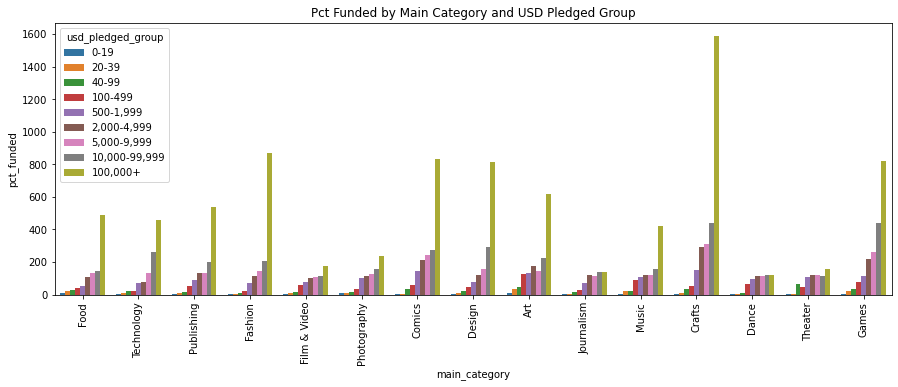

In [110]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("Pct Funded by Main Category and USD Pledged Group")
sns.barplot(x=df3["main_category"], y = df3["pct_funded"], hue = df3["usd_pledged_group"], ci=None)

<AxesSubplot:title={'center':'USD Pledged by Main Category and Pct Funded'}, xlabel='pct_funded_group', ylabel='usd pledged'>

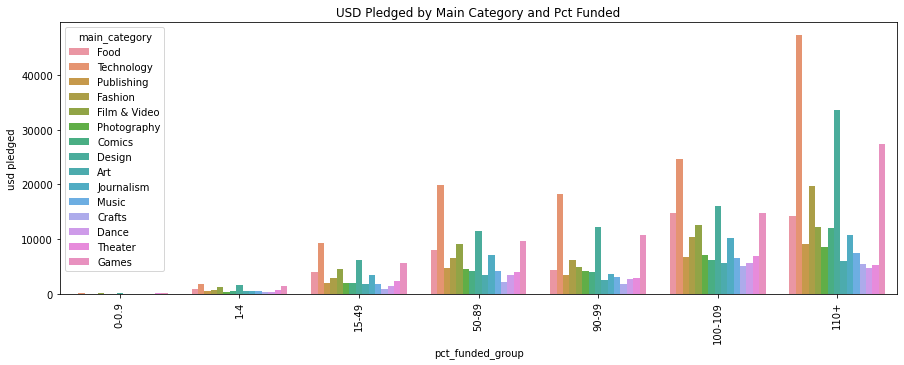

In [112]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title("USD Pledged by Main Category and Pct Funded")
sns.barplot(x=df3["pct_funded_group"], y = df3["usd pledged"], hue = df3["main_category"], ci=None)

In [ ]:
# average number of backers and pledges by main category and subcategory 


In [ ]:
## state by campaign main category (crosstab)
# hint: list 'state' second for an easier to read table


# HINT: it's easier to understand the differences between groups by looking at percentages

In [ ]:
## state by campaign sub-category (crosstab)
# hint: list 'state' second for an easier to read table



# HINT: it's easier to understand the differences between groups by looking at percentages

## <font color=#306EFF>Part 5: Group Presentation</font>

By now, your group should feel very comfortable with the aspects of the Kickstarter dataset. You should have a firm understanding of what Kickstarter is, what the dataset contains, the characteristics of each variable, how the variables interact with each other, and finally, which variables influence the outcome of the Kickstarter campaign. Can you put all this information together to tell a story about the data? Your presentation should include visualizations and clear answers to the two primary questions:

    1. What kinds of projects should the Kickstarter Marking Team focus their attention on?
    2. Why should the Marketing Team focus their attention in that direction?

In addition to these two questions, your presentation should cover the additional questions listed below. These questions should be easy to answer using the information you discovered above. When you are done, submit your completed notebook to me.   

### <font color=#306EFF>Questions to Answer</font>
1.	What main category is the most profitable (highest amount of money pledged)? 
2.	Which main category is the most popular (highest number of backers)?
3.	Which sub-categories are the most profitable and popular (top 3)?
4.	What are some of the characteristics of a successful Kickstarter campaign? 
5.	How does the success or failure of Kickstarter campaigns differ between main category, sub-category, country, and length of campaign? Please mention only the most notable – you do not need to detail the success/failure rate for each category/sub-category? 

***

### <font color=#306EFF>TIPS FOR A GREAT PRESENTATION</font>

* Start with the most important information (answers to the two questions above), and work backwards. The entire class will be working with the same dataset, therefore, we don't need to know the details of all your coding -- we just want to know what findings are most important to the questions. 
* Create clear visualizations. Make sure your audience can quickly and easily understand what your visualizations are showing. While you have a lot of options for how to style your visualizations, don't go overboard! 
* Make sure everyone understands what the visualization is showing; it should not have to stand on its own. When you present a visualization, you should be able to discuss what it means and what the significance is. 
* Use a single presentation format -- you can create a PowerPoint presentation or organize your notebook in a way that is easy to follow; reguardless of what your group puts together, you should use only ONE format. 